#**SMARTPHONE PRICE PREDICTION**

**Objective**

* The objective of this project is to develop a Machine Learning model that can accurately predict smartphone prices based on key specifications. By analyzing a dataset containing various smartphone features, the model helps users estimate the price of a phone before making a purchase decision.

**Key Goals:**
* Identify the most influential factors affecting phone prices (e.g., RAM, Storage, Camera Quality).
* Compare multiple Machine Learning models to determine the best-performing one.
* Build an interactive Streamlit app that allows users to input specifications and get an instant price prediction.
* Provide data-driven insights for consumers and manufacturers.

**Feature Descriptions**
1. Brand – The manufacturer of the phone.
2. Model – The specific model name of the phone.
3. RAM (GB) – The amount of Random Access Memory (RAM), which affects performance.
4. Storage (GB) – The internal storage capacity of the phone.
5. Camera_Quality (MP) – The primary camera resolution in megapixels.
6. Processor_Type – The chipset used in the phone.
7. Screen_Size (inches) – The display size of the phone in inches.
8. Battery_Life (mAh) – The battery capacity, which influences usage time.
9. OS_Version – The operating system version.
10. Release_Year – The year the phone was released.
11. Network – The supported network type.
12. Price (INR) – The phone's price.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Project/Machine Learning/Dataset/Phone_Price_Prediction_Dataset.csv')

#**1. Data Inspection and Cleaning**

In [3]:
df.head(3)

,Brand,Model,RAM,Storage,Camera_Quality,Processor_Type,Screen_Size,Battery_Life,OS_Version,Release_Year,Network,Price (INR)
0,Vivo,V23,4,256,48,A15 Bionic,6.4,4000,iOS 15,2023,5G,60257
1,Google,Pixel 7,6,512,64,Exynos 2100,5.8,6000,iOS 14,2022,5G,73211
2,Google,Pixel 5,12,128,12,A15 Bionic,6.1,5000,iOS 15,2020,5G,65920


In [4]:
df.tail(3)

,Brand,Model,RAM,Storage,Camera_Quality,Processor_Type,Screen_Size,Battery_Life,OS_Version,Release_Year,Network,Price (INR)
9997,Realme,Realme 9,12,128,108,A14 Bionic,6.1,4000,Android 12,2020,5G,69095
9998,Xiaomi,Mi 11,12,64,12,Snapdragon 888,6.4,5000,Android 12,2021,4G,44034
9999,Samsung,Galaxy S21,6,128,108,MediaTek Dimensity 1200,6.1,4000,iOS 14,2021,5G,53670


In [5]:
df.describe()

,RAM,Storage,Camera_Quality,Screen_Size,Battery_Life,Release_Year,Price (INR)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.485600,238.272000,58.384800,6.381270,4597.400000,2021.518500,61999.912100
std,2.942968,170.974472,34.607706,0.392899,865.498786,1.127557,18043.516001
min,4.000000,64.000000,12.000000,5.800000,3500.000000,2020.000000,23367.000000
25%,4.000000,128.000000,48.000000,6.100000,4000.000000,2020.000000,48609.000000
50%,8.000000,128.000000,64.000000,6.400000,4500.000000,2022.000000,59908.000000
75%,8.000000,256.000000,108.000000,6.700000,5000.000000,2023.000000,72963.500000
max,12.000000,512.000000,108.000000,6.900000,6000.000000,2023.000000,136982.000000


In [6]:
for i in df.columns:
  print(df[i].value_counts(),i)
  print('*'*100)

Brand
Google     1283
OnePlus    1282
Samsung    1263
Xiaomi     1260
Apple      1256
Realme     1240
Vivo       1235
Oppo       1181
Name: count, dtype: int64 Brand
****************************************************************************************************
Model
Redmi Note 10    342
Pixel 7          341
OnePlus 8T       338
iPhone SE        334
X70              329
OnePlus 9        326
Realme X7        325
Pixel 5          323
OnePlus 10T      323
Galaxy A52       319
Galaxy M32       319
Galaxy S22       317
Realme 8         316
iPhone 14        316
Pixel 6a         314
Realme 9         314
X60              314
Mi 11            313
iPhone 13        310
Redmi Note 11    309
V21              308
Galaxy S21       308
Pixel 6          305
Reno 6           301
Find X3          301
Poco X3          296
iPhone 12        296
Reno 5           295
OnePlus Nord     295
Realme GT        285
Reno 7           284
V23              284
Name: count, dtype: int64 Model
***********************

In [7]:
for i in df.columns:
  print(df[i].unique(),i)
  print('*'*100)

['Vivo' 'Google' 'Samsung' 'Oppo' 'Xiaomi' 'OnePlus' 'Realme' 'Apple'] Brand
****************************************************************************************************
['V23' 'Pixel 7' 'Pixel 5' 'Galaxy A52' 'Reno 7' 'Mi 11' 'Galaxy S21'
 'OnePlus 9' 'Redmi Note 11' 'X70' 'Realme GT' 'Galaxy S22' 'V21' 'Reno 6'
 'iPhone 13' 'X60' 'Realme 9' 'Poco X3' 'Redmi Note 10' 'Reno 5'
 'iPhone SE' 'iPhone 12' 'OnePlus Nord' 'iPhone 14' 'Realme X7' 'Pixel 6'
 'Realme 8' 'Galaxy M32' 'OnePlus 10T' 'Find X3' 'Pixel 6a' 'OnePlus 8T'] Model
****************************************************************************************************
[ 4  6 12  8] RAM
****************************************************************************************************
[256 512 128  64] Storage
****************************************************************************************************
[ 48  64  12 108] Camera_Quality
******************************************************************************

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           10000 non-null  object 
 1   Model           10000 non-null  object 
 2   RAM             10000 non-null  int64  
 3   Storage         10000 non-null  int64  
 4   Camera_Quality  10000 non-null  int64  
 5   Processor_Type  10000 non-null  object 
 6   Screen_Size     10000 non-null  float64
 7   Battery_Life    10000 non-null  int64  
 8   OS_Version      10000 non-null  object 
 9   Release_Year    10000 non-null  int64  
 10  Network         10000 non-null  object 
 11  Price (INR)     10000 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 937.6+ KB


In [9]:
df.shape

(10000, 12)

In [10]:
df.size

120000

In [11]:
df.columns

Index(['Brand', 'Model', 'RAM', 'Storage', 'Camera_Quality', 'Processor_Type',
       'Screen_Size', 'Battery_Life', 'OS_Version', 'Release_Year', 'Network',
       'Price (INR)'],
      dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [13]:
df.dtypes

,0
Brand,object
Model,object
RAM,int64
Storage,int64
Camera_Quality,int64
Processor_Type,object
Screen_Size,float64
Battery_Life,int64
OS_Version,object
Release_Year,int64


In [14]:
df.isnull().sum()

,0
Brand,0
Model,0
RAM,0
Storage,0
Camera_Quality,0
Processor_Type,0
Screen_Size,0
Battery_Life,0
OS_Version,0
Release_Year,0


In [15]:
df.duplicated().sum()

0

#**2. Data Visualization**

**1. Phone Price Distribution**

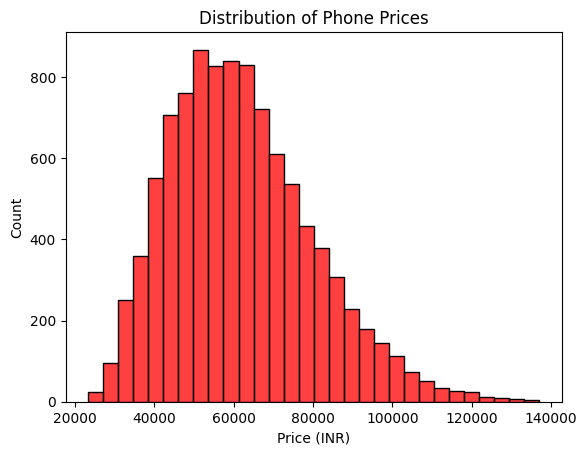

In [16]:
sns.histplot(df['Price (INR)'], bins=30,color='r')
plt.title('Distribution of Phone Prices')
plt.show()

This histogram shows how phone prices are distributed in the dataset.  
- Most phones are priced between **₹40,000 - ₹70,000**, with a peak around ₹60,000.  
- A few premium models are priced **above ₹1,00,000**.  
- This indicates that flagship models are limited compared to mid-range smartphones.
- This suggests that mid-range smartphones are more common than high-end models in the dataset.

**2. Average Price by Brand**

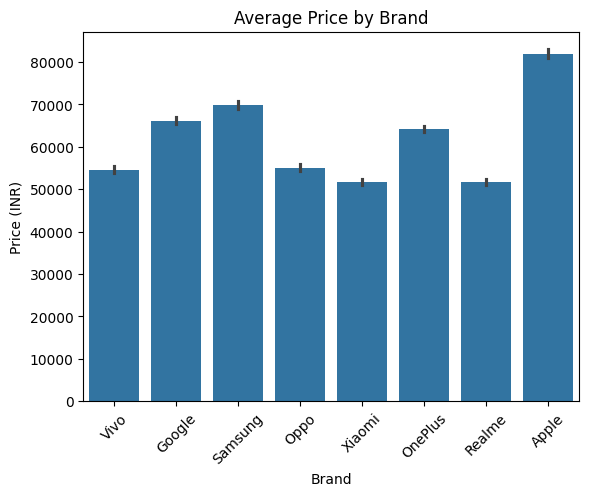

In [17]:
sns.barplot(x='Brand', y='Price (INR)', data=df)
plt.xticks(rotation=45)
plt.title('Average Price by Brand')
plt.show()

This bar chart displays the **average smartphone price for each brand**.  
- **Apple** has the **highest average price**, followed by **Samsung and Google**.  
- **Realme, Xiaomi, and Oppo** focus more on **budget-friendly and mid-range models**.

**3. Brand Distribution**

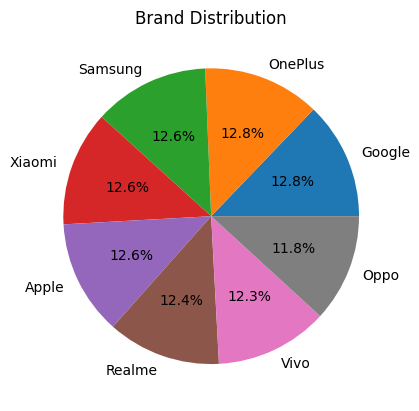

In [18]:
brand_counts = df['Brand'].value_counts()
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%')
plt.title('Brand Distribution')
plt.show()

This pie chart represents the distribution of smartphone brands in the dataset.  
- **OnePlus and Google** have the **highest representation** at **12.8% each**.  
- **Samsung, Xiaomi, and Apple** follow closely, each making up **12.6%** of the dataset.  
- **Realme and Vivo** have slightly lower shares at **12.4% and 12.3%**, respectively.  
- **Oppo has the lowest representation** at **11.8%**.

**4. Correlation Heatmap**

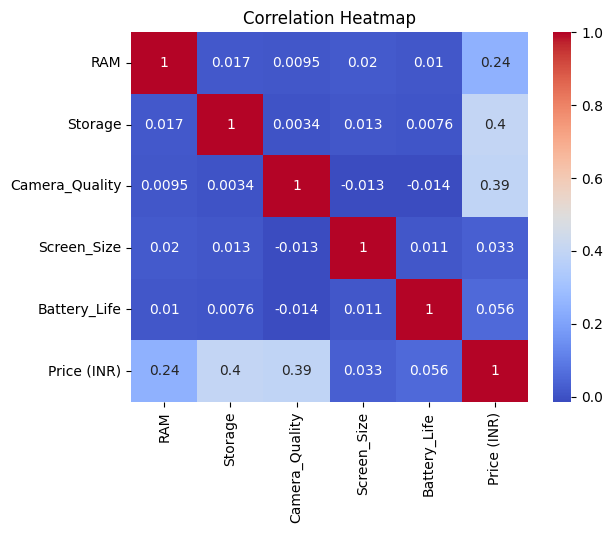

In [19]:
corr = df[['RAM', 'Storage', 'Camera_Quality', 'Screen_Size', 'Battery_Life', 'Price (INR)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This heatmap shows the correlation between different smartphone features and price.  
- **Storage (0.40), Camera Quality (0.39), and RAM (0.24)** have a **moderate correlation** with price, meaning they influence phone pricing significantly.  
- **Screen Size (0.033) and Battery Life (0.056)** have a **very weak correlation** with price, indicating they have little impact.  

#**3.DataType Conversion**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           10000 non-null  object 
 1   Model           10000 non-null  object 
 2   RAM             10000 non-null  int64  
 3   Storage         10000 non-null  int64  
 4   Camera_Quality  10000 non-null  int64  
 5   Processor_Type  10000 non-null  object 
 6   Screen_Size     10000 non-null  float64
 7   Battery_Life    10000 non-null  int64  
 8   OS_Version      10000 non-null  object 
 9   Release_Year    10000 non-null  int64  
 10  Network         10000 non-null  object 
 11  Price (INR)     10000 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 937.6+ KB


**Brand**

In [21]:
df['Brand'].unique()

array(['Vivo', 'Google', 'Samsung', 'Oppo', 'Xiaomi', 'OnePlus', 'Realme',
       'Apple'], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder(sparse_output=False)
one.fit(df[['Brand']])
out=one.transform(df[['Brand']])

In [23]:
one.get_feature_names_out()

array(['Brand_Apple', 'Brand_Google', 'Brand_OnePlus', 'Brand_Oppo',
       'Brand_Realme', 'Brand_Samsung', 'Brand_Vivo', 'Brand_Xiaomi'],
      dtype=object)

In [24]:
brand_df=pd.DataFrame(out,columns=one.get_feature_names_out())

In [25]:
df=df.reset_index(drop=True)
brand_df=brand_df.reset_index(drop=True)

In [26]:
df=pd.concat([df,brand_df],axis=1)

In [27]:
df.drop('Brand',axis=1,inplace=True)

In [28]:
df.head(1)

,Model,RAM,Storage,Camera_Quality,Processor_Type,Screen_Size,Battery_Life,OS_Version,Release_Year,Network,Price (INR),Brand_Apple,Brand_Google,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Vivo,Brand_Xiaomi
0,V23,4,256,48,A15 Bionic,6.4,4000,iOS 15,2023,5G,60257,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Model**

In [29]:
df['Model'].unique()

array(['V23', 'Pixel 7', 'Pixel 5', 'Galaxy A52', 'Reno 7', 'Mi 11',
       'Galaxy S21', 'OnePlus 9', 'Redmi Note 11', 'X70', 'Realme GT',
       'Galaxy S22', 'V21', 'Reno 6', 'iPhone 13', 'X60', 'Realme 9',
       'Poco X3', 'Redmi Note 10', 'Reno 5', 'iPhone SE', 'iPhone 12',
       'OnePlus Nord', 'iPhone 14', 'Realme X7', 'Pixel 6', 'Realme 8',
       'Galaxy M32', 'OnePlus 10T', 'Find X3', 'Pixel 6a', 'OnePlus 8T'],
      dtype=object)

In [30]:
from sklearn.preprocessing import OneHotEncoder
one1=OneHotEncoder(sparse_output=False)
one1.fit(df[['Model']])
out1=one1.transform(df[['Model']])

In [31]:
one1.get_feature_names_out()

array(['Model_Find X3', 'Model_Galaxy A52', 'Model_Galaxy M32',
       'Model_Galaxy S21', 'Model_Galaxy S22', 'Model_Mi 11',
       'Model_OnePlus 10T', 'Model_OnePlus 8T', 'Model_OnePlus 9',
       'Model_OnePlus Nord', 'Model_Pixel 5', 'Model_Pixel 6',
       'Model_Pixel 6a', 'Model_Pixel 7', 'Model_Poco X3',
       'Model_Realme 8', 'Model_Realme 9', 'Model_Realme GT',
       'Model_Realme X7', 'Model_Redmi Note 10', 'Model_Redmi Note 11',
       'Model_Reno 5', 'Model_Reno 6', 'Model_Reno 7', 'Model_V21',
       'Model_V23', 'Model_X60', 'Model_X70', 'Model_iPhone 12',
       'Model_iPhone 13', 'Model_iPhone 14', 'Model_iPhone SE'],
      dtype=object)

In [32]:
model_df=pd.DataFrame(out1,columns=one1.get_feature_names_out())

In [33]:
df=df.reset_index(drop=True)
model_df=model_df.reset_index(drop=True)

In [34]:
df=pd.concat([df,model_df],axis=1)

In [35]:
df.drop('Model',axis=1,inplace=True)

In [36]:
df.head(1)

,RAM,Storage,Camera_Quality,Processor_Type,Screen_Size,Battery_Life,OS_Version,Release_Year,Network,Price (INR),...,Model_Reno 6,Model_Reno 7,Model_V21,Model_V23,Model_X60,Model_X70,Model_iPhone 12,Model_iPhone 13,Model_iPhone 14,Model_iPhone SE
0,4,256,48,A15 Bionic,6.4,4000,iOS 15,2023,5G,60257,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Processor_Type**

In [37]:
df['Processor_Type'].unique()

array(['A15 Bionic', 'Exynos 2100', 'A14 Bionic',
       'MediaTek Dimensity 1200', 'Snapdragon 888'], dtype=object)

In [38]:
from sklearn.preprocessing import OneHotEncoder
one2=OneHotEncoder(sparse_output=False)
one2.fit(df[['Processor_Type']])
out2=one2.transform(df[['Processor_Type']])


In [39]:
one2.get_feature_names_out()

array(['Processor_Type_A14 Bionic', 'Processor_Type_A15 Bionic',
       'Processor_Type_Exynos 2100',
       'Processor_Type_MediaTek Dimensity 1200',
       'Processor_Type_Snapdragon 888'], dtype=object)

In [40]:
pro_df=pd.DataFrame(out2,columns=one2.get_feature_names_out())

In [41]:
df=df.reset_index(drop=True)
pro_df=pro_df.reset_index(drop=True)

In [42]:
df=pd.concat([df,pro_df],axis=1)

In [43]:
df.drop('Processor_Type',axis=1,inplace=True)

In [44]:
df.head(1)

,RAM,Storage,Camera_Quality,Screen_Size,Battery_Life,OS_Version,Release_Year,Network,Price (INR),Brand_Apple,...,Model_X70,Model_iPhone 12,Model_iPhone 13,Model_iPhone 14,Model_iPhone SE,Processor_Type_A14 Bionic,Processor_Type_A15 Bionic,Processor_Type_Exynos 2100,Processor_Type_MediaTek Dimensity 1200,Processor_Type_Snapdragon 888
0,4,256,48,6.4,4000,iOS 15,2023,5G,60257,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Os_Version**

In [45]:
df['OS_Version'].unique()

array(['iOS 15', 'iOS 14', 'Android 11', 'iOS 16', 'Android 12'],
      dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le1.fit(df['OS_Version'])
df['OS_Version']=le1.transform(df['OS_Version'])

**Network**

In [47]:
df['Network'].unique()

array(['5G', '4G'], dtype=object)

In [48]:
from sklearn.preprocessing import OneHotEncoder
one3=OneHotEncoder(sparse_output=False)
one3.fit(df[['Network']])
out3=one3.transform(df[['Network']])

In [49]:
one3.get_feature_names_out()

array(['Network_4G', 'Network_5G'], dtype=object)

In [50]:
network_df=pd.DataFrame(out3,columns=one3.get_feature_names_out())

In [51]:
df=df.reset_index(drop=True)
network_df=network_df.reset_index(drop=True)

In [52]:
df=pd.concat([df,network_df],axis=1)

In [53]:
df.drop('Network',axis=1,inplace=True)

In [54]:
df.head(1)

,RAM,Storage,Camera_Quality,Screen_Size,Battery_Life,OS_Version,Release_Year,Price (INR),Brand_Apple,Brand_Google,...,Model_iPhone 13,Model_iPhone 14,Model_iPhone SE,Processor_Type_A14 Bionic,Processor_Type_A15 Bionic,Processor_Type_Exynos 2100,Processor_Type_MediaTek Dimensity 1200,Processor_Type_Snapdragon 888,Network_4G,Network_5G
0,4,256,48,6.4,4000,3,2023,60257,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   RAM                                     10000 non-null  int64  
 1   Storage                                 10000 non-null  int64  
 2   Camera_Quality                          10000 non-null  int64  
 3   Screen_Size                             10000 non-null  float64
 4   Battery_Life                            10000 non-null  int64  
 5   OS_Version                              10000 non-null  int64  
 6   Release_Year                            10000 non-null  int64  
 7   Price (INR)                             10000 non-null  int64  
 8   Brand_Apple                             10000 non-null  float64
 9   Brand_Google                            10000 non-null  float64
 10  Brand_OnePlus                           10000 non-null  flo

In [56]:
df.rename(columns={'Price (INR)':'Price_in_Rupees'},inplace=True)

In [57]:
corr_matrix=df.corr()['Price_in_Rupees']
corr_matrix

,Price_in_Rupees
RAM,0.244725
Storage,0.400036
Camera_Quality,0.389840
Screen_Size,0.033115
Battery_Life,0.055749
OS_Version,0.032715
Release_Year,0.093300
Price_in_Rupees,1.000000
Brand_Apple,0.419304
Brand_Google,0.089275


**Correlation of Price with-respect-to Other Features**

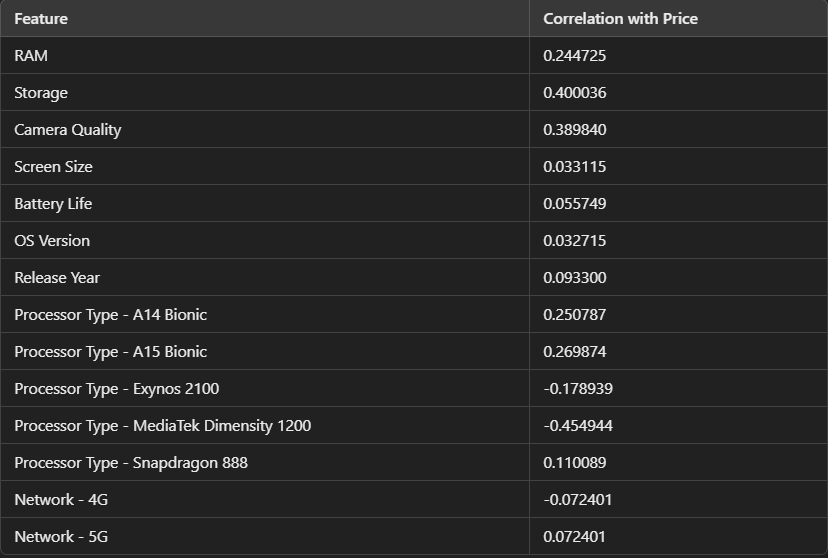

#**4.Finding Outliers**

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

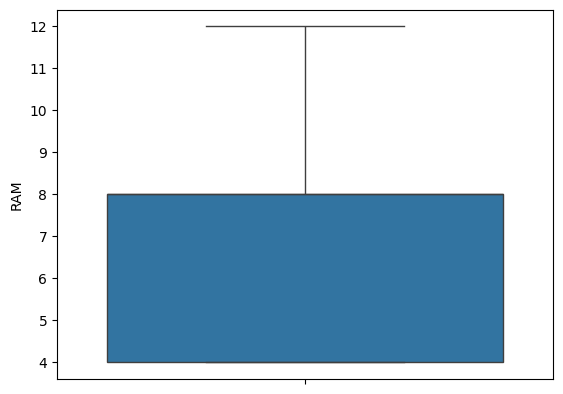

In [59]:
sns.boxplot(df['RAM'])
plt.show()

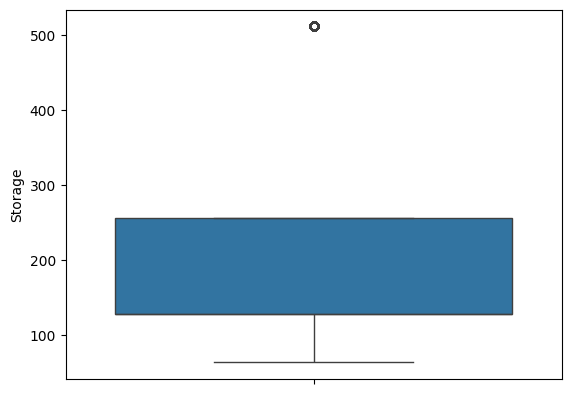

In [60]:
sns.boxplot(df['Storage'])
plt.show()

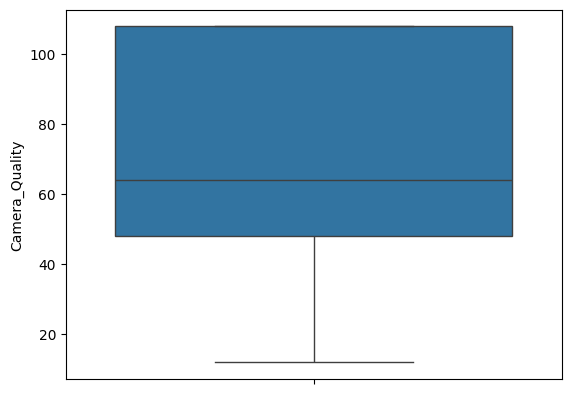

In [61]:
sns.boxplot(df['Camera_Quality'])
plt.show()

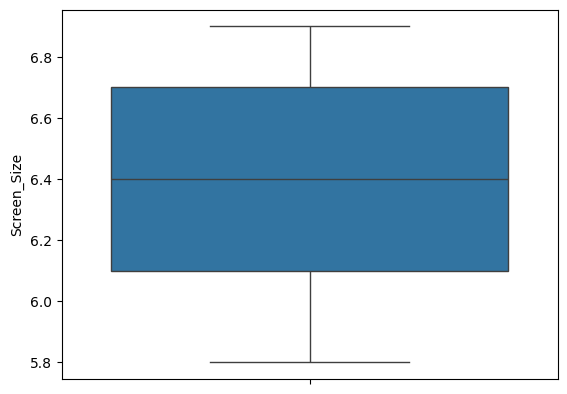

In [62]:
sns.boxplot(df['Screen_Size'])
plt.show()

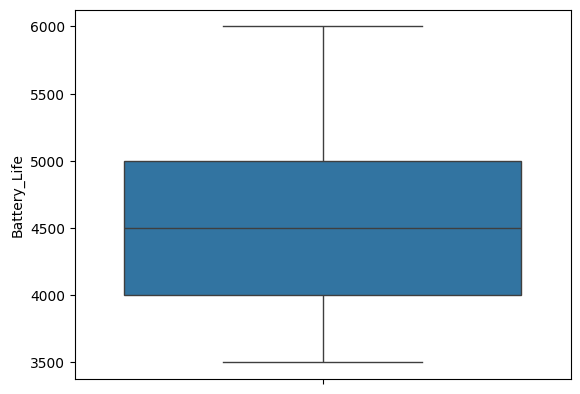

In [63]:
sns.boxplot(df['Battery_Life'])
plt.show()

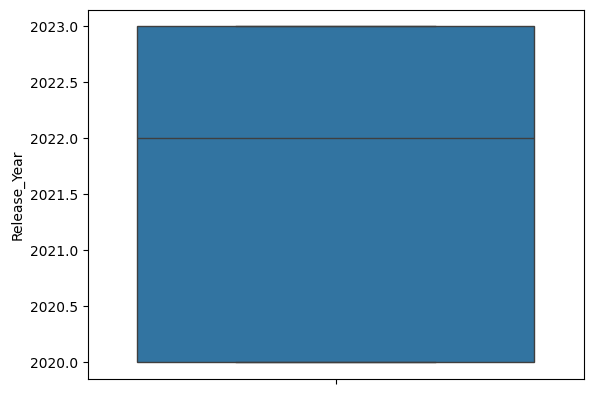

In [64]:
sns.boxplot(df['Release_Year'])
plt.show()

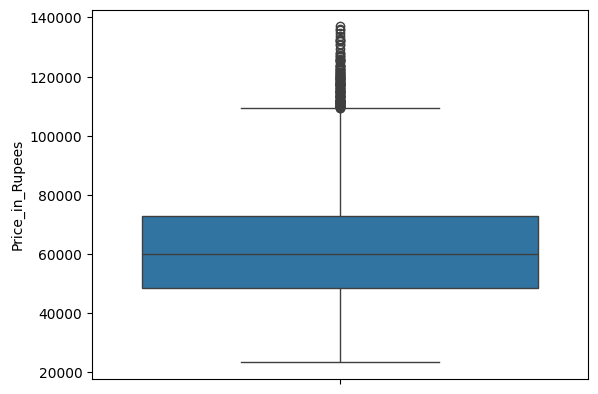

In [65]:
sns.boxplot(df['Price_in_Rupees'])
plt.show()

#**5.Model Training**

**Spliiting the data into Input and Output**

In [66]:
x=df.drop('Price_in_Rupees',axis=1)
y=df['Price_in_Rupees']

**Preprocessing the data**

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)

**Splitting the data into Training and Testing Sets**

In [68]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

#**Model Building**

#**KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [ ]:
para={'n_neighbors':[3,5,7,9,11,13],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':[15,20,25,30,35,40],'p':[1,2],'metric':['minkowski','euclidean','manhattan']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(knn,para,cv=5,scoring='r2')
rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [15, 20, 25, 30, 35, 40],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='r2')

In [ ]:
rs.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 5,
 'metric': 'manhattan',
 'leaf_size': 20,
 'algorithm': 'auto'}

In [ ]:
knn1=KNeighborsRegressor(n_neighbors=5,weights='distance',metric='manhattan',p=1,leaf_size=20,algorithm='auto')
knn1.fit(xtrain,ytrain)

KNeighborsRegressor(leaf_size=20, metric='manhattan', p=1, weights='distance')

**Model Prediction**

In [ ]:
pred=knn1.predict(xtest)

In [ ]:
pred

array([54973.21782562, 48334.47182823, 53590.94199672, ...,
       64733.84655756, 54429.50707711, 99598.89249276])

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE=',mean_absolute_error(ytest,pred))
print('MSE=',mean_squared_error(ytest,pred))
print('R2_Score=',r2_score(ytest,pred))

MAE= 5449.620084738901
MSE= 50070480.771481976
R2_Score= 0.8475676497234111


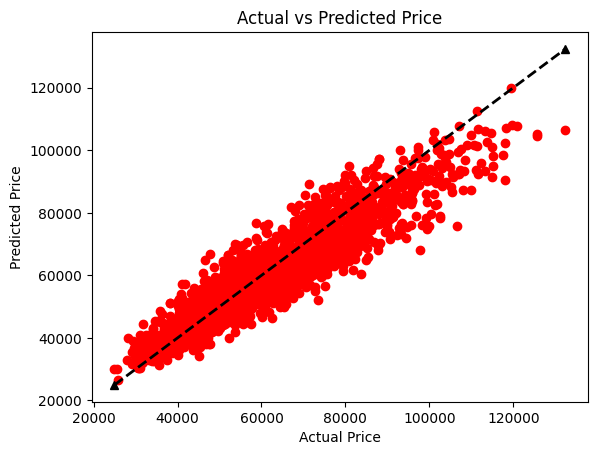

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest,pred,color='r')
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'k--',lw=2,marker='^')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

#**DecisionTree Regressor Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [ ]:
from scipy.stats import randint
para1={'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],'splitter':["best", "random"],'max_depth':randint(3,11),'min_samples_split':randint(2,11),'min_samples_leaf':randint(1,11),'max_features':randint(1,11)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs1=RandomizedSearchCV(dtr,para1,cv=5,scoring='r2')
rs1.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4686e86090>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4686e7a6d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e46844ce250>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4686e63ad0>,
                                        'splitter': ['best', 'random']},
                   scoring='r2')

In [ ]:
rs1.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 7,
 'min_samples_split': 5,
 'splitter': 'random'}

**Model Building**

In [ ]:
dtr1=DecisionTreeRegressor(criterion='friedman_mse',max_depth=7,max_features=6,min_samples_leaf=7,min_samples_split=5,splitter='random')
dtr1.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, max_features=6,
                      min_samples_leaf=7, min_samples_split=5,
                      splitter='random')

**Model Prediction**

In [ ]:
pred1=dtr1.predict(xtest)
pred1

array([64018.61791045, 61441.23253012, 61441.23253012, ...,
       78335.97623762, 55123.08189655, 87720.34006734])

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE=',mean_absolute_error(ytest,pred1))
print('MSE=',mean_squared_error(ytest,pred1))
print('R2_Score=',r2_score(ytest,pred1))

MAE= 9513.473566639708
MSE= 152338543.66762468
R2_Score= 0.5362272961797747


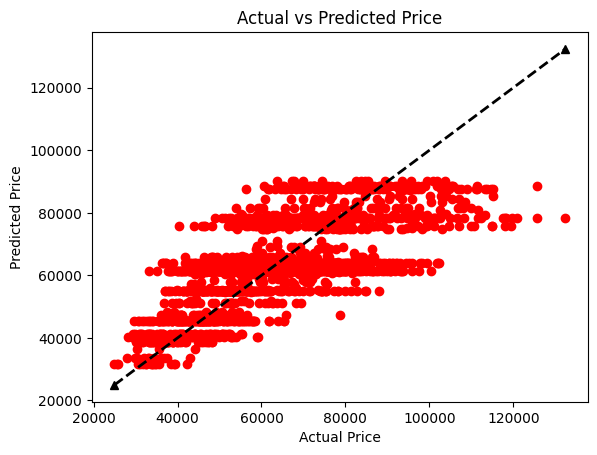

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest,pred1,color='r')
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'k--',lw=2,marker='^')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

#**LinearRegression Model**

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [70]:
from scipy.stats import randint
para2 = {'fit_intercept':[True,False],'positive':[True,False],'copy_X':[True,False],'n_jobs':randint(1,11)}

In [71]:
from sklearn.model_selection import RandomizedSearchCV
rs2 = RandomizedSearchCV(lr,para2,cv=5,scoring='r2')
rs2.fit(xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 640, in fit
    self.coef_ = optimize.nnls(

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e62b04f3510>,
                                        'positive': [True, False]},
                   scoring='r2')

In [72]:
rs2.best_params_

{'copy_X': False, 'fit_intercept': True, 'n_jobs': 4, 'positive': False}

**Model Building**

In [73]:
lr1=LinearRegression(copy_X=False,fit_intercept=True,n_jobs=4,positive=False)
lr1.fit(xtrain,ytrain)

LinearRegression(copy_X=False, n_jobs=4)

**Model Prediction**

In [74]:
pred2=lr1.predict(xtest)
pred2

array([ 57725.91703892,  52993.26783193, 100280.5718617 , ...,
        54896.18428252,  68341.31946535,  71987.45763334])

**Model Evaluation**

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE=',mean_absolute_error(ytest,pred2))
print('MSE=',mean_squared_error(ytest,pred2))
print('R2_Score=',r2_score(ytest,pred2))

MAE= 2192.4469423734413
MSE= 8956175.968024211
R2_Score= 0.9726146794401552


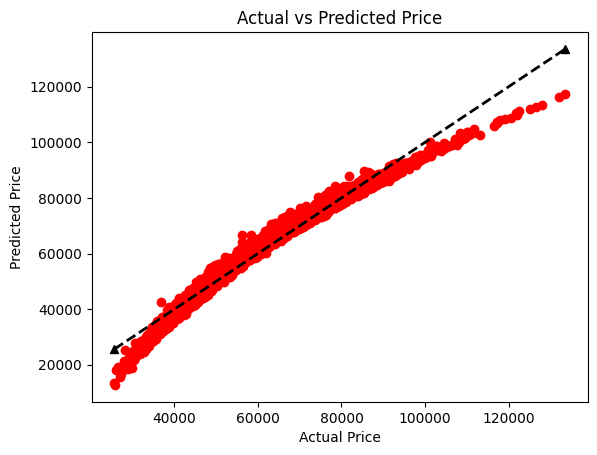

In [76]:
import matplotlib.pyplot as plt
plt.scatter(ytest,pred2,color='r')
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'k--',lw=2,marker='^')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

#**SVM Model**

In [ ]:
from sklearn.svm import SVR
svr=SVR()

In [ ]:
from scipy.stats import randint
para3= {
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'C': randint(1, 6),
    'shrinking': [True, False]}

In [ ]:
rs3=RandomizedSearchCV(svr,para3,cv=5,scoring='r2')
rs3.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4686ed84d0>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf'],
                                        'shrinking': [True, False]},
                   scoring='r2')

In [ ]:
rs3.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}

**Model Building**

In [ ]:
svr1=SVR(C=5,gamma='scale',kernel='linear',shrinking=True)
svr1.fit(xtrain,ytrain)

SVR(C=5, kernel='linear')

**Model Prediction**

In [ ]:
pred3=svr1.predict(xtest)
pred3

array([51987.15183396, 47665.11219102, 46338.69902059, ...,
       79163.04538726, 52376.96240849, 94354.16141716])

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE=',mean_absolute_error(ytest,pred3))
print('MSE=',mean_squared_error(ytest,pred3))
print('R2_Score=',r2_score(ytest,pred3))

MAE= 2429.823624115302
MSE= 13354439.76406546
R2_Score= 0.959344336053928


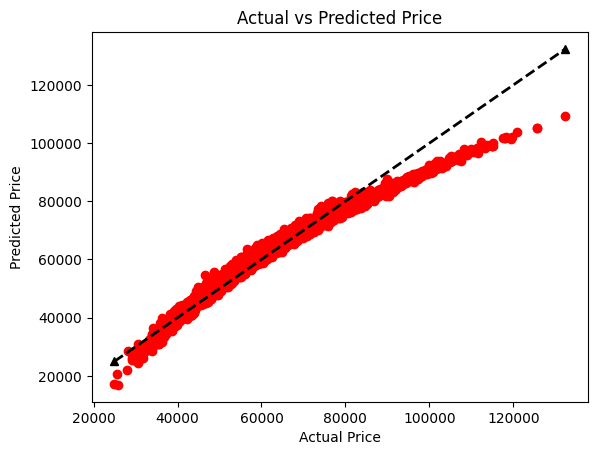

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest,pred3,color='r')
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'k--',lw=2,marker='^')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

#**AdaBoosting**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

In [ ]:
from scipy.stats import randint,uniform

para4={'n_estimators':randint(10,51),
       'learning_rate':uniform(0.01,0.98),
       'loss':['linear', 'square', 'exponential'],
       'random_state':randint(1,43)}



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rs4=RandomizedSearchCV(ada,para4,cv=5,scoring='r2')
rs4.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e4686fb64d0>,
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e468bfa7f10>,
                                        'random_state': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4686fa4590>},
                   scoring='r2')

In [ ]:
rs4.best_params_

{'learning_rate': 0.7604708830388562,
 'loss': 'square',
 'n_estimators': 27,
 'random_state': 30}

**Buidling Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
ada1=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),learning_rate=0.7604708830388562,loss='square',n_estimators=27,random_state=30)
ada1.fit(xtrain,ytrain)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),
                  learning_rate=0.7604708830388562, loss='square',
                  n_estimators=27, random_state=30)

**Model Predicition**

In [ ]:
pred4=ada1.predict(xtest)
pred4

array([ 56421.58565737,  51020.51677852,  53884.97967914, ...,
        91619.85472973,  56435.67167543, 101332.        ])

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE=',mean_absolute_error(ytest,pred4))
print('MSE=',mean_squared_error(ytest,pred4))
print('R2_Score=',r2_score(ytest,pred4))

MAE= 4581.580466189107
MSE= 30335454.239667263
R2_Score= 0.9076480889495655


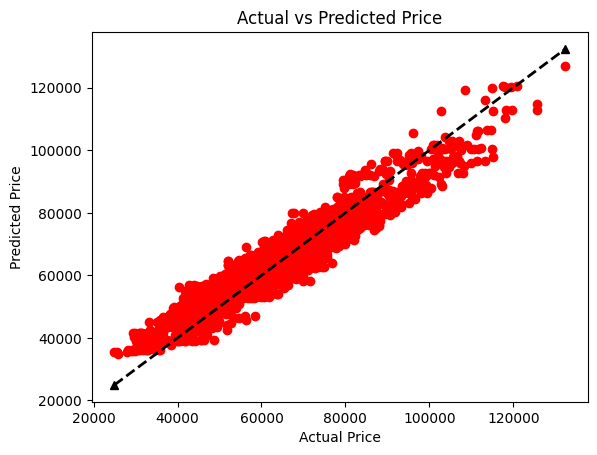

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest,pred4,color='r')
plt.plot([ytest.min(),ytest.max()],[ytest.min(),ytest.max()],'k--',lw=2,marker='^')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

# **For GUI**

In [77]:
import pickle

pickle.dump(lr1,open('model.sav','wb'))
pickle.dump(sc,open('scaler.sav','wb'))

pickle.dump(one,open('one.sav','wb'))
pickle.dump(one1,open('one1.sav','wb'))
pickle.dump(one2,open('one2.sav','wb'))
pickle.dump(one3,open('one3.sav','wb'))
pickle.dump(le1,open('le1.sav','wb'))
